In [1]:
import numpy as np
import pandas as pd
import statsmodels.api as sm

In [2]:
KoGES_AS = pd.read_csv("MM2_01_gen.csv", usecols = ['DIST_ID', 'A00_SEX', 'A01_AGE'], encoding = 'cp949')
KoGES_Smoke = pd.read_csv("MM2_03_smoke.csv", encoding = 'cp949', usecols = ['DIST_ID', 'A01_SMOKE', 'A01_SMDU', 'A01_SMAM', 'A01_PACKYR'])
KoGES_Drug = pd.read_csv("MM2_05_drug_2.csv", usecols = ['DIST_ID', 'A01_DRUGDM', 'A01_DRUGDMCU'])
#KoGES_TD2 = pd.read_csv("MM2_07_disease_1.csv", usecols = ['DIST_ID', 'A01_DM', 'A01_DMCU'], encoding = 'cp949')
KoGES_Bodycom = pd.read_csv("MM2_11_bodycom.csv", usecols = ['DIST_ID', 'A01_OBDIG1', 'A01_OBDIG2'], encoding = 'cp949')
KoGES_Anthro = pd.read_csv("MM2_15_anthro.csv", usecols = ['DIST_ID', 'A01_HEIGHT', 'A01_WEIGHT'])
KoGES_Glucose = pd.read_csv("MM2_14_biochem_1.csv", usecols = ['DIST_ID', 'A01_HBA1C', 'A01_GLU0_TR', 'A01_GLU60_TR', 'A01_GLU120_TR'], encoding = 'cp949')

In [3]:
KoGES_Glucose['A01_GLU0_TR'] = np.where((KoGES_Glucose['A01_GLU0_TR'] >= 55555), np.nan, KoGES_Glucose['A01_GLU0_TR'])

In [65]:
# KoGES_Glucose['A01_GLU0_TR'].describe()

In [4]:
KoGES_Glucose = KoGES_Glucose.dropna(subset=['A01_GLU0_TR'])
KoGES_Glucose

,DIST_ID,A01_HBA1C,A01_GLU0_TR,A01_GLU60_TR,A01_GLU120_TR
0,NIH20O9035690,6.4,107.0,254,164
1,NIH20O9342110,5.2,69.0,117,106
2,NIH20O9780793,5.4,82.0,155,84
3,NIH20O9239896,5.6,86.0,187,110
4,NIH20O9023416,6.0,77.0,179,93
...,...,...,...,...,...
9328,NIH20O9850172,5.8,87.0,122,146
9329,NIH20O9155178,5.4,77.0,83,92
9330,NIH20O9897791,5.9,82.0,183,156
9331,NIH20O9178931,6.4,86.0,207,141


In [5]:
KoGES_Glucose['A01_GLU60_TR'] = np.where((KoGES_Glucose['A01_GLU60_TR'] >= 55555), np.nan, KoGES_Glucose['A01_GLU60_TR'])

In [6]:
KoGES_Glucose = KoGES_Glucose.dropna(subset=['A01_GLU60_TR'])
KoGES_Glucose

,DIST_ID,A01_HBA1C,A01_GLU0_TR,A01_GLU60_TR,A01_GLU120_TR
0,NIH20O9035690,6.4,107.0,254.0,164
1,NIH20O9342110,5.2,69.0,117.0,106
2,NIH20O9780793,5.4,82.0,155.0,84
3,NIH20O9239896,5.6,86.0,187.0,110
4,NIH20O9023416,6.0,77.0,179.0,93
...,...,...,...,...,...
9328,NIH20O9850172,5.8,87.0,122.0,146
9329,NIH20O9155178,5.4,77.0,83.0,92
9330,NIH20O9897791,5.9,82.0,183.0,156
9331,NIH20O9178931,6.4,86.0,207.0,141


In [7]:
KoGES_Glucose['A01_GLU120_TR'] = np.where((KoGES_Glucose['A01_GLU120_TR'] >= 55555), np.nan, KoGES_Glucose['A01_GLU120_TR'])

/data/home/beahn/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [66]:
# KoGES_Glucose['A01_GLU120_TR'].describe()

In [8]:
KoGES_Glucose = KoGES_Glucose.dropna(subset=['A01_GLU120_TR'])
KoGES_Glucose

,DIST_ID,A01_HBA1C,A01_GLU0_TR,A01_GLU60_TR,A01_GLU120_TR
0,NIH20O9035690,6.4,107.0,254.0,164.0
1,NIH20O9342110,5.2,69.0,117.0,106.0
2,NIH20O9780793,5.4,82.0,155.0,84.0
3,NIH20O9239896,5.6,86.0,187.0,110.0
4,NIH20O9023416,6.0,77.0,179.0,93.0
...,...,...,...,...,...
9328,NIH20O9850172,5.8,87.0,122.0,146.0
9329,NIH20O9155178,5.4,77.0,83.0,92.0
9330,NIH20O9897791,5.9,82.0,183.0,156.0
9331,NIH20O9178931,6.4,86.0,207.0,141.0


In [9]:
KoGES_Glucose[(KoGES_Glucose['A01_GLU0_TR'] > KoGES_Glucose['A01_GLU60_TR'])]

,DIST_ID,A01_HBA1C,A01_GLU0_TR,A01_GLU60_TR,A01_GLU120_TR
43,NIH20O9184692,5.6,86.0,80.0,69.0
50,NIH20O9164853,5.3,102.0,72.0,111.0
56,NIH20O9693410,5.8,83.0,81.0,115.0
69,NIH20O9847895,5.5,75.0,62.0,102.0
86,NIH20O9528274,5.2,75.0,73.0,80.0
...,...,...,...,...,...
9164,NIH20O9305458,5.3,89.0,53.0,87.0
9191,NIH20O9672984,5.1,80.0,59.0,89.0
9194,NIH20O9487133,5.2,82.0,70.0,93.0
9200,NIH20O9649314,5.5,81.0,69.0,100.0


In [10]:
KoGES_Glucose = KoGES_Glucose[KoGES_Glucose['A01_GLU60_TR'] > KoGES_Glucose['A01_GLU0_TR']]
KoGES_Glucose

,DIST_ID,A01_HBA1C,A01_GLU0_TR,A01_GLU60_TR,A01_GLU120_TR
0,NIH20O9035690,6.4,107.0,254.0,164.0
1,NIH20O9342110,5.2,69.0,117.0,106.0
2,NIH20O9780793,5.4,82.0,155.0,84.0
3,NIH20O9239896,5.6,86.0,187.0,110.0
4,NIH20O9023416,6.0,77.0,179.0,93.0
...,...,...,...,...,...
9328,NIH20O9850172,5.8,87.0,122.0,146.0
9329,NIH20O9155178,5.4,77.0,83.0,92.0
9330,NIH20O9897791,5.9,82.0,183.0,156.0
9331,NIH20O9178931,6.4,86.0,207.0,141.0


In [11]:
KoGES_Glucose[(KoGES_Glucose['A01_GLU0_TR'] > KoGES_Glucose['A01_GLU120_TR'])]

,DIST_ID,A01_HBA1C,A01_GLU0_TR,A01_GLU60_TR,A01_GLU120_TR
19,NIH20O9816003,5.1,72.0,125.0,60.0
25,NIH20O9960330,5.7,74.0,150.0,67.0
27,NIH20O9933399,5.2,84.0,173.0,81.0
30,NIH20O9364682,5.5,72.0,105.0,68.0
34,NIH20O9889227,5.4,78.0,80.0,53.0
...,...,...,...,...,...
9212,NIH20O9977957,5.6,86.0,190.0,76.0
9238,NIH20O9113161,5.1,76.0,98.0,62.0
9245,NIH20O9186463,6.2,84.0,127.0,72.0
9276,NIH20O9880511,5.2,80.0,123.0,70.0


In [12]:
KoGES_Glucose = KoGES_Glucose[KoGES_Glucose['A01_GLU120_TR'] > KoGES_Glucose['A01_GLU0_TR']]
KoGES_Glucose

,DIST_ID,A01_HBA1C,A01_GLU0_TR,A01_GLU60_TR,A01_GLU120_TR
0,NIH20O9035690,6.4,107.0,254.0,164.0
1,NIH20O9342110,5.2,69.0,117.0,106.0
2,NIH20O9780793,5.4,82.0,155.0,84.0
3,NIH20O9239896,5.6,86.0,187.0,110.0
4,NIH20O9023416,6.0,77.0,179.0,93.0
...,...,...,...,...,...
9328,NIH20O9850172,5.8,87.0,122.0,146.0
9329,NIH20O9155178,5.4,77.0,83.0,92.0
9330,NIH20O9897791,5.9,82.0,183.0,156.0
9331,NIH20O9178931,6.4,86.0,207.0,141.0


In [13]:
KoGES_Glucose['GLU_1h'] = KoGES_Glucose['A01_GLU60_TR'] - KoGES_Glucose['A01_GLU0_TR'] 
KoGES_Glucose['GLU_2h'] = KoGES_Glucose['A01_GLU120_TR'] - KoGES_Glucose['A01_GLU0_TR'] 
KoGES_Glucose

/data/home/beahn/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/data/home/beahn/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,DIST_ID,A01_HBA1C,A01_GLU0_TR,A01_GLU60_TR,A01_GLU120_TR,GLU_1h,GLU_2h
0,NIH20O9035690,6.4,107.0,254.0,164.0,147.0,57.0
1,NIH20O9342110,5.2,69.0,117.0,106.0,48.0,37.0
2,NIH20O9780793,5.4,82.0,155.0,84.0,73.0,2.0
3,NIH20O9239896,5.6,86.0,187.0,110.0,101.0,24.0
4,NIH20O9023416,6.0,77.0,179.0,93.0,102.0,16.0
...,...,...,...,...,...,...,...
9328,NIH20O9850172,5.8,87.0,122.0,146.0,35.0,59.0
9329,NIH20O9155178,5.4,77.0,83.0,92.0,6.0,15.0
9330,NIH20O9897791,5.9,82.0,183.0,156.0,101.0,74.0
9331,NIH20O9178931,6.4,86.0,207.0,141.0,121.0,55.0


In [14]:
KoGES_Anthro['A01_HEIGHT'] = np.where((KoGES_Anthro['A01_HEIGHT'] >= 55555), np.nan, KoGES_Anthro['A01_HEIGHT'])
KoGES_Anthro['A01_WEIGHT'] = np.where((KoGES_Anthro['A01_WEIGHT'] >= 55555), np.nan, KoGES_Anthro['A01_WEIGHT'])

In [15]:
KoGES_Anthro

,DIST_ID,A01_HEIGHT,A01_WEIGHT
0,NIH20O9776999,154.6,56.6
1,NIH20O9730961,163.7,56.7
2,NIH20O9162489,157.0,54.1
3,NIH20O9342771,164.3,67.6
4,NIH20O9871247,160.1,60.9
...,...,...,...
9328,NIH20O9850172,154.0,52.0
9329,NIH20O9155178,153.5,59.0
9330,NIH20O9897791,150.0,60.0
9331,NIH20O9178931,156.2,66.5


In [16]:
KoGES_Anthro = KoGES_Anthro.dropna(subset=['A01_HEIGHT'])
KoGES_Anthro

,DIST_ID,A01_HEIGHT,A01_WEIGHT
0,NIH20O9776999,154.6,56.6
1,NIH20O9730961,163.7,56.7
2,NIH20O9162489,157.0,54.1
3,NIH20O9342771,164.3,67.6
4,NIH20O9871247,160.1,60.9
...,...,...,...
9328,NIH20O9850172,154.0,52.0
9329,NIH20O9155178,153.5,59.0
9330,NIH20O9897791,150.0,60.0
9331,NIH20O9178931,156.2,66.5


In [17]:
KoGES_Anthro = KoGES_Anthro.dropna(subset=['A01_WEIGHT'])
KoGES_Anthro

,DIST_ID,A01_HEIGHT,A01_WEIGHT
0,NIH20O9776999,154.6,56.6
1,NIH20O9730961,163.7,56.7
2,NIH20O9162489,157.0,54.1
3,NIH20O9342771,164.3,67.6
4,NIH20O9871247,160.1,60.9
...,...,...,...
9328,NIH20O9850172,154.0,52.0
9329,NIH20O9155178,153.5,59.0
9330,NIH20O9897791,150.0,60.0
9331,NIH20O9178931,156.2,66.5


In [18]:
KoGES_Anthro['A01_HEIGHT'] = (KoGES_Anthro['A01_HEIGHT'])/100
KoGES_Anthro['BMI'] = (KoGES_Anthro['A01_WEIGHT']/(KoGES_Anthro['A01_HEIGHT']**2))

/data/home/beahn/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/data/home/beahn/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [19]:
KoGES_Anthro

,DIST_ID,A01_HEIGHT,A01_WEIGHT,BMI
0,NIH20O9776999,1.546,56.6,23.680859
1,NIH20O9730961,1.637,56.7,21.158540
2,NIH20O9162489,1.570,54.1,21.948152
3,NIH20O9342771,1.643,67.6,25.042147
4,NIH20O9871247,1.601,60.9,23.759354
...,...,...,...,...
9328,NIH20O9850172,1.540,52.0,21.926126
9329,NIH20O9155178,1.535,59.0,25.040053
9330,NIH20O9897791,1.500,60.0,26.666667
9331,NIH20O9178931,1.562,66.5,27.255841


In [20]:
KoGES_Bodycom['A01_OBDIG1'] = np.where((KoGES_Bodycom['A01_OBDIG1'] >= 55555), np.nan, KoGES_Bodycom['A01_OBDIG1'])
KoGES_Bodycom['A01_OBDIG2'] = np.where((KoGES_Bodycom['A01_OBDIG2'] >= 55555), np.nan, KoGES_Bodycom['A01_OBDIG2'])

In [21]:
KoGES_Bodycom

,DIST_ID,A01_OBDIG1,A01_OBDIG2
0,NIH20O9035690,28.0,0.91
1,NIH20O9342110,35.0,0.92
2,NIH20O9780793,15.9,0.83
3,NIH20O9239896,33.8,0.90
4,NIH20O9023416,17.6,0.89
...,...,...,...
9328,NIH20O9850172,27.3,0.89
9329,NIH20O9155178,26.7,0.89
9330,NIH20O9897791,39.5,0.96
9331,NIH20O9178931,33.6,0.95


In [22]:
KoGES_Bodycom = KoGES_Bodycom.dropna(subset=['A01_OBDIG1'])
KoGES_Bodycom

,DIST_ID,A01_OBDIG1,A01_OBDIG2
0,NIH20O9035690,28.0,0.91
1,NIH20O9342110,35.0,0.92
2,NIH20O9780793,15.9,0.83
3,NIH20O9239896,33.8,0.90
4,NIH20O9023416,17.6,0.89
...,...,...,...
9328,NIH20O9850172,27.3,0.89
9329,NIH20O9155178,26.7,0.89
9330,NIH20O9897791,39.5,0.96
9331,NIH20O9178931,33.6,0.95


In [23]:
KoGES_Bodycom = KoGES_Bodycom.dropna(subset=['A01_OBDIG2'])
KoGES_Bodycom

,DIST_ID,A01_OBDIG1,A01_OBDIG2
0,NIH20O9035690,28.0,0.91
1,NIH20O9342110,35.0,0.92
2,NIH20O9780793,15.9,0.83
3,NIH20O9239896,33.8,0.90
4,NIH20O9023416,17.6,0.89
...,...,...,...
9328,NIH20O9850172,27.3,0.89
9329,NIH20O9155178,26.7,0.89
9330,NIH20O9897791,39.5,0.96
9331,NIH20O9178931,33.6,0.95


In [24]:
KoGES_Smoke['A01_SMOKE'] = np.where((KoGES_Smoke['A01_SMOKE'] >= 55555), np.nan, KoGES_Smoke['A01_SMOKE'])
KoGES_Smoke['A01_SMDU'] = np.where((KoGES_Smoke['A01_SMDU'] >= 55555), np.nan, KoGES_Smoke['A01_SMDU'])
KoGES_Smoke['A01_SMAM'] = np.where((KoGES_Smoke['A01_SMAM'] >= 55555), np.nan, KoGES_Smoke['A01_SMAM'])
KoGES_Smoke['A01_PACKYR'] = np.where((KoGES_Smoke['A01_PACKYR'] >= 55555), np.nan, KoGES_Smoke['A01_PACKYR'])

In [25]:
KoGES_Smoke

,DIST_ID,A01_SMOKE,A01_SMDU,A01_SMAM,A01_PACKYR
0,NIH20O9649052,3.0,20.0,40.0,40.0
1,NIH20O9742615,3.0,21.4,10.0,10.7
2,NIH20O9286687,1.0,NaN,NaN,0.0
3,NIH20O9074260,1.0,NaN,NaN,0.0
4,NIH20O9965326,3.0,40.0,10.0,20.0
...,...,...,...,...,...
9328,NIH20O9850172,3.0,30.0,10.0,15.0
9329,NIH20O9155178,1.0,NaN,NaN,0.0
9330,NIH20O9897791,1.0,NaN,NaN,0.0
9331,NIH20O9178931,1.0,NaN,NaN,0.0


In [26]:
KoGES_Smoke = KoGES_Smoke.dropna(subset=['A01_SMOKE'])
KoGES_Smoke

,DIST_ID,A01_SMOKE,A01_SMDU,A01_SMAM,A01_PACKYR
0,NIH20O9649052,3.0,20.0,40.0,40.0
1,NIH20O9742615,3.0,21.4,10.0,10.7
2,NIH20O9286687,1.0,NaN,NaN,0.0
3,NIH20O9074260,1.0,NaN,NaN,0.0
4,NIH20O9965326,3.0,40.0,10.0,20.0
...,...,...,...,...,...
9328,NIH20O9850172,3.0,30.0,10.0,15.0
9329,NIH20O9155178,1.0,NaN,NaN,0.0
9330,NIH20O9897791,1.0,NaN,NaN,0.0
9331,NIH20O9178931,1.0,NaN,NaN,0.0


In [27]:
KoGES_Smoke.loc[(KoGES_Smoke['A01_SMOKE'] == 1) | (KoGES_Smoke['A01_SMOKE'] == 2), ['A01_SMDU', 'A01_SMAM']] = 0
KoGES_Smoke

/data/home/beahn/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


,DIST_ID,A01_SMOKE,A01_SMDU,A01_SMAM,A01_PACKYR
0,NIH20O9649052,3.0,20.0,40.0,40.0
1,NIH20O9742615,3.0,21.4,10.0,10.7
2,NIH20O9286687,1.0,0.0,0.0,0.0
3,NIH20O9074260,1.0,0.0,0.0,0.0
4,NIH20O9965326,3.0,40.0,10.0,20.0
...,...,...,...,...,...
9328,NIH20O9850172,3.0,30.0,10.0,15.0
9329,NIH20O9155178,1.0,0.0,0.0,0.0
9330,NIH20O9897791,1.0,0.0,0.0,0.0
9331,NIH20O9178931,1.0,0.0,0.0,0.0


In [102]:
# KoGES_Smoke[(KoGES_Smoke['A01_SMOKE']==2)]

In [28]:
KoGES_Smoke = KoGES_Smoke.dropna(subset=['A01_SMDU'])
KoGES_Smoke

,DIST_ID,A01_SMOKE,A01_SMDU,A01_SMAM,A01_PACKYR
0,NIH20O9649052,3.0,20.0,40.0,40.0
1,NIH20O9742615,3.0,21.4,10.0,10.7
2,NIH20O9286687,1.0,0.0,0.0,0.0
3,NIH20O9074260,1.0,0.0,0.0,0.0
4,NIH20O9965326,3.0,40.0,10.0,20.0
...,...,...,...,...,...
9328,NIH20O9850172,3.0,30.0,10.0,15.0
9329,NIH20O9155178,1.0,0.0,0.0,0.0
9330,NIH20O9897791,1.0,0.0,0.0,0.0
9331,NIH20O9178931,1.0,0.0,0.0,0.0


In [29]:
KoGES_Smoke = KoGES_Smoke.dropna(subset=['A01_SMAM'])
KoGES_Smoke

,DIST_ID,A01_SMOKE,A01_SMDU,A01_SMAM,A01_PACKYR
0,NIH20O9649052,3.0,20.0,40.0,40.0
1,NIH20O9742615,3.0,21.4,10.0,10.7
2,NIH20O9286687,1.0,0.0,0.0,0.0
3,NIH20O9074260,1.0,0.0,0.0,0.0
4,NIH20O9965326,3.0,40.0,10.0,20.0
...,...,...,...,...,...
9328,NIH20O9850172,3.0,30.0,10.0,15.0
9329,NIH20O9155178,1.0,0.0,0.0,0.0
9330,NIH20O9897791,1.0,0.0,0.0,0.0
9331,NIH20O9178931,1.0,0.0,0.0,0.0


In [30]:
KoGES_Smoke['A01_SMOKE'] = KoGES_Smoke['A01_SMOKE'].replace({1:0, 2:0, 3:1})
KoGES_Smoke

/data/home/beahn/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,DIST_ID,A01_SMOKE,A01_SMDU,A01_SMAM,A01_PACKYR
0,NIH20O9649052,1.0,20.0,40.0,40.0
1,NIH20O9742615,1.0,21.4,10.0,10.7
2,NIH20O9286687,0.0,0.0,0.0,0.0
3,NIH20O9074260,0.0,0.0,0.0,0.0
4,NIH20O9965326,1.0,40.0,10.0,20.0
...,...,...,...,...,...
9328,NIH20O9850172,1.0,30.0,10.0,15.0
9329,NIH20O9155178,0.0,0.0,0.0,0.0
9330,NIH20O9897791,0.0,0.0,0.0,0.0
9331,NIH20O9178931,0.0,0.0,0.0,0.0


In [31]:
KoGES_AS['A00_SEX'] = np.where((KoGES_AS['A00_SEX'] >= 55555), np.nan, KoGES_AS['A00_SEX'])
KoGES_AS['A01_AGE'] = np.where((KoGES_AS['A01_AGE'] >= 55555), np.nan, KoGES_AS['A01_AGE'])

In [32]:
KoGES_AS

,DIST_ID,A00_SEX,A01_AGE
0,NIH20O9035690,1.0,53.0
1,NIH20O9342110,2.0,44.0
2,NIH20O9780793,1.0,47.0
3,NIH20O9239896,2.0,43.0
4,NIH20O9023416,1.0,61.0
...,...,...,...
9328,NIH20O9850172,2.0,62.0
9329,NIH20O9155178,2.0,60.0
9330,NIH20O9897791,2.0,62.0
9331,NIH20O9178931,2.0,65.0


In [33]:
KoGES_AS = KoGES_AS.dropna(subset=['A00_SEX'])
KoGES_AS

,DIST_ID,A00_SEX,A01_AGE
0,NIH20O9035690,1.0,53.0
1,NIH20O9342110,2.0,44.0
2,NIH20O9780793,1.0,47.0
3,NIH20O9239896,2.0,43.0
4,NIH20O9023416,1.0,61.0
...,...,...,...
9328,NIH20O9850172,2.0,62.0
9329,NIH20O9155178,2.0,60.0
9330,NIH20O9897791,2.0,62.0
9331,NIH20O9178931,2.0,65.0


In [34]:
KoGES_AS = KoGES_AS.dropna(subset=['A01_AGE'])
KoGES_AS

,DIST_ID,A00_SEX,A01_AGE
0,NIH20O9035690,1.0,53.0
1,NIH20O9342110,2.0,44.0
2,NIH20O9780793,1.0,47.0
3,NIH20O9239896,2.0,43.0
4,NIH20O9023416,1.0,61.0
...,...,...,...
9328,NIH20O9850172,2.0,62.0
9329,NIH20O9155178,2.0,60.0
9330,NIH20O9897791,2.0,62.0
9331,NIH20O9178931,2.0,65.0


In [35]:
KoGES_AS['A00_SEX'] = KoGES_AS['A00_SEX'].replace({1:0, 2:1})
KoGES_AS

,DIST_ID,A00_SEX,A01_AGE
0,NIH20O9035690,0.0,53.0
1,NIH20O9342110,1.0,44.0
2,NIH20O9780793,0.0,47.0
3,NIH20O9239896,1.0,43.0
4,NIH20O9023416,0.0,61.0
...,...,...,...
9328,NIH20O9850172,1.0,62.0
9329,NIH20O9155178,1.0,60.0
9330,NIH20O9897791,1.0,62.0
9331,NIH20O9178931,1.0,65.0


In [36]:
KoGES_Drug['A01_DRUGDM'] = np.where((KoGES_Drug['A01_DRUGDM'] >= 55555), np.nan, KoGES_Drug['A01_DRUGDM'])
KoGES_Drug

,DIST_ID,A01_DRUGDM,A01_DRUGDMCU
0,NIH20O9023416,NaN,99999
1,NIH20O9294975,1.0,77777
2,NIH20O9649052,1.0,77777
3,NIH20O9742615,1.0,77777
4,NIH20O9286687,1.0,77777
...,...,...,...
9328,NIH20O9850172,1.0,77777
9329,NIH20O9155178,1.0,77777
9330,NIH20O9897791,1.0,77777
9331,NIH20O9178931,1.0,77777


In [40]:
KoGES_Drug = KoGES_Drug.dropna(subset=['A01_DRUGDM'])
KoGES_Drug

,DIST_ID,A01_DRUGDM,A01_DRUGDMCU
1,NIH20O9294975,1.0,77777
2,NIH20O9649052,1.0,77777
3,NIH20O9742615,1.0,77777
4,NIH20O9286687,1.0,77777
5,NIH20O9074260,1.0,77777
...,...,...,...
9328,NIH20O9850172,1.0,77777
9329,NIH20O9155178,1.0,77777
9330,NIH20O9897791,1.0,77777
9331,NIH20O9178931,1.0,77777


In [41]:
KoGES_Drug[KoGES_Drug['A01_DRUGDM'] == 2]

,DIST_ID,A01_DRUGDM,A01_DRUGDMCU
95,NIH20O9202050,2.0,2
101,NIH20O9214772,2.0,2
111,NIH20O9319689,2.0,2
147,NIH20O9024429,2.0,2
199,NIH20O9401946,2.0,2
...,...,...,...
9030,NIH20O9449750,2.0,2
9060,NIH20O9814401,2.0,2
9123,NIH20O9267958,2.0,2
9125,NIH20O9851570,2.0,2


In [42]:
KoGES_Drug[(KoGES_Drug['A01_DRUGDM'] == 2) & (KoGES_Drug['A01_DRUGDMCU'] >= 55555 )]

,DIST_ID,A01_DRUGDM,A01_DRUGDMCU


In [43]:
KoGES_Drug[(KoGES_Drug['A01_DRUGDM'] == 2) & (KoGES_Drug['A01_DRUGDMCU'] == 1 )]

,DIST_ID,A01_DRUGDM,A01_DRUGDMCU
1401,NIH20O9309390,2.0,1
1956,NIH20O9704880,2.0,1
2208,NIH20O9028390,2.0,1
2490,NIH20O9008590,2.0,1
2649,NIH20O9832404,2.0,1
2881,NIH20O9316292,2.0,1
3159,NIH20O9075786,2.0,1
3223,NIH20O9789857,2.0,1
3230,NIH20O9695746,2.0,1
3499,NIH20O9403004,2.0,1


In [44]:
KoGES_Drug[(KoGES_Drug['A01_DRUGDM'] == 2) & (KoGES_Drug['A01_DRUGDMCU'] == 2 )]

,DIST_ID,A01_DRUGDM,A01_DRUGDMCU
95,NIH20O9202050,2.0,2
101,NIH20O9214772,2.0,2
111,NIH20O9319689,2.0,2
147,NIH20O9024429,2.0,2
199,NIH20O9401946,2.0,2
...,...,...,...
9030,NIH20O9449750,2.0,2
9060,NIH20O9814401,2.0,2
9123,NIH20O9267958,2.0,2
9125,NIH20O9851570,2.0,2


In [45]:
KoGES_Drug['DMDRUG'] = 0
KoGES_Drug.loc[(KoGES_Drug['A01_DRUGDM'] == 2) & (KoGES_Drug['A01_DRUGDMCU'] == 2), 'DMDRUG'] = 1
KoGES_Drug

/data/home/beahn/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,DIST_ID,A01_DRUGDM,A01_DRUGDMCU,DMDRUG
1,NIH20O9294975,1.0,77777,0
2,NIH20O9649052,1.0,77777,0
3,NIH20O9742615,1.0,77777,0
4,NIH20O9286687,1.0,77777,0
5,NIH20O9074260,1.0,77777,0
...,...,...,...,...
9328,NIH20O9850172,1.0,77777,0
9329,NIH20O9155178,1.0,77777,0
9330,NIH20O9897791,1.0,77777,0
9331,NIH20O9178931,1.0,77777,0


In [163]:
#KoGES_TD2['A01_DM'] = np.where((KoGES_TD2['A01_DM'] >= 55555), np.nan, KoGES_TD2['A01_DM'])
#KoGES_TD2['A01_DMCU'] = np.where((KoGES_TD2['A01_DMCU'] >= 55555), np.nan, KoGES_TD2['A01_DMCU'])

In [164]:
#KoGES_TD2

,DIST_ID,A01_DM,A01_DMCU
0,NIH20O9035690,2.0,NaN
1,NIH20O9342110,1.0,NaN
2,NIH20O9780793,1.0,NaN
3,NIH20O9239896,1.0,NaN
4,NIH20O9023416,1.0,NaN
...,...,...,...
9328,NIH20O9850172,1.0,NaN
9329,NIH20O9155178,1.0,NaN
9330,NIH20O9897791,1.0,NaN
9331,NIH20O9178931,1.0,NaN


In [165]:
#KoGES_TD2 = KoGES_TD2.dropna(subset=['A01_DM'])
#KoGES_TD2

,DIST_ID,A01_DM,A01_DMCU
0,NIH20O9035690,2.0,NaN
1,NIH20O9342110,1.0,NaN
2,NIH20O9780793,1.0,NaN
3,NIH20O9239896,1.0,NaN
4,NIH20O9023416,1.0,NaN
...,...,...,...
9328,NIH20O9850172,1.0,NaN
9329,NIH20O9155178,1.0,NaN
9330,NIH20O9897791,1.0,NaN
9331,NIH20O9178931,1.0,NaN


In [107]:
# KoGES_TD2[(KoGES_TD2['A01_DM']==2) & (KoGES_TD2['A01_DMCU']==1)]

,DIST_ID,A01_DM,A01_DMCU


In [166]:
#KoGES_TD2['A01_DM'] = KoGES_TD2['A01_DM'].replace({1:0, 2:1})
#KoGES_TD2

/data/home/beahn/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,DIST_ID,A01_DM,A01_DMCU
0,NIH20O9035690,1.0,NaN
1,NIH20O9342110,0.0,NaN
2,NIH20O9780793,0.0,NaN
3,NIH20O9239896,0.0,NaN
4,NIH20O9023416,0.0,NaN
...,...,...,...
9328,NIH20O9850172,0.0,NaN
9329,NIH20O9155178,0.0,NaN
9330,NIH20O9897791,0.0,NaN
9331,NIH20O9178931,0.0,NaN


In [46]:
KoGES_Whole = pd.merge(KoGES_AS, KoGES_Smoke, on='DIST_ID')
KoGES_Whole

,DIST_ID,A00_SEX,A01_AGE,A01_SMOKE,A01_SMDU,A01_SMAM,A01_PACKYR
0,NIH20O9035690,0.0,53.0,0.0,0.0,0.0,3.5
1,NIH20O9342110,1.0,44.0,0.0,0.0,0.0,0.0
2,NIH20O9780793,0.0,47.0,1.0,20.0,8.0,8.0
3,NIH20O9239896,1.0,43.0,0.0,0.0,0.0,0.0
4,NIH20O9023416,0.0,61.0,1.0,30.0,20.0,30.0
...,...,...,...,...,...,...,...
9102,NIH20O9850172,1.0,62.0,1.0,30.0,10.0,15.0
9103,NIH20O9155178,1.0,60.0,0.0,0.0,0.0,0.0
9104,NIH20O9897791,1.0,62.0,0.0,0.0,0.0,0.0
9105,NIH20O9178931,1.0,65.0,0.0,0.0,0.0,0.0


In [48]:
KoGES_Whole = pd.merge(KoGES_Whole, KoGES_Drug, on='DIST_ID')
KoGES_Whole

,DIST_ID,A00_SEX,A01_AGE,A01_SMOKE,A01_SMDU,A01_SMAM,A01_PACKYR,A01_DRUGDM,A01_DRUGDMCU,DMDRUG
0,NIH20O9035690,0.0,53.0,0.0,0.0,0.0,3.5,1.0,77777,0
1,NIH20O9780793,0.0,47.0,1.0,20.0,8.0,8.0,1.0,77777,0
2,NIH20O9239896,1.0,43.0,0.0,0.0,0.0,0.0,1.0,77777,0
3,NIH20O9294975,1.0,62.0,0.0,0.0,0.0,0.0,1.0,77777,0
4,NIH20O9649052,1.0,41.0,1.0,20.0,40.0,40.0,1.0,77777,0
...,...,...,...,...,...,...,...,...,...,...
8629,NIH20O9850172,1.0,62.0,1.0,30.0,10.0,15.0,1.0,77777,0
8630,NIH20O9155178,1.0,60.0,0.0,0.0,0.0,0.0,1.0,77777,0
8631,NIH20O9897791,1.0,62.0,0.0,0.0,0.0,0.0,1.0,77777,0
8632,NIH20O9178931,1.0,65.0,0.0,0.0,0.0,0.0,1.0,77777,0


In [49]:
KoGES_Whole = pd.merge(KoGES_Whole, KoGES_Bodycom, on='DIST_ID')
KoGES_Whole

,DIST_ID,A00_SEX,A01_AGE,A01_SMOKE,A01_SMDU,A01_SMAM,A01_PACKYR,A01_DRUGDM,A01_DRUGDMCU,DMDRUG,A01_OBDIG1,A01_OBDIG2
0,NIH20O9035690,0.0,53.0,0.0,0.0,0.0,3.5,1.0,77777,0,28.0,0.91
1,NIH20O9780793,0.0,47.0,1.0,20.0,8.0,8.0,1.0,77777,0,15.9,0.83
2,NIH20O9239896,1.0,43.0,0.0,0.0,0.0,0.0,1.0,77777,0,33.8,0.90
3,NIH20O9294975,1.0,62.0,0.0,0.0,0.0,0.0,1.0,77777,0,33.1,0.94
4,NIH20O9649052,1.0,41.0,1.0,20.0,40.0,40.0,1.0,77777,0,34.2,0.89
...,...,...,...,...,...,...,...,...,...,...,...,...
8559,NIH20O9850172,1.0,62.0,1.0,30.0,10.0,15.0,1.0,77777,0,27.3,0.89
8560,NIH20O9155178,1.0,60.0,0.0,0.0,0.0,0.0,1.0,77777,0,26.7,0.89
8561,NIH20O9897791,1.0,62.0,0.0,0.0,0.0,0.0,1.0,77777,0,39.5,0.96
8562,NIH20O9178931,1.0,65.0,0.0,0.0,0.0,0.0,1.0,77777,0,33.6,0.95


In [50]:
KoGES_Whole = pd.merge(KoGES_Whole, KoGES_Anthro, on='DIST_ID')
KoGES_Whole

,DIST_ID,A00_SEX,A01_AGE,A01_SMOKE,A01_SMDU,A01_SMAM,A01_PACKYR,A01_DRUGDM,A01_DRUGDMCU,DMDRUG,A01_OBDIG1,A01_OBDIG2,A01_HEIGHT,A01_WEIGHT,BMI
0,NIH20O9035690,0.0,53.0,0.0,0.0,0.0,3.5,1.0,77777,0,28.0,0.91,1.680,71.2,25.226757
1,NIH20O9780793,0.0,47.0,1.0,20.0,8.0,8.0,1.0,77777,0,15.9,0.83,1.687,59.9,21.047313
2,NIH20O9239896,1.0,43.0,0.0,0.0,0.0,0.0,1.0,77777,0,33.8,0.90,1.594,67.0,26.369274
3,NIH20O9294975,1.0,62.0,0.0,0.0,0.0,0.0,1.0,77777,0,33.1,0.94,1.487,57.0,25.778220
4,NIH20O9649052,1.0,41.0,1.0,20.0,40.0,40.0,1.0,77777,0,34.2,0.89,1.538,64.0,27.056231
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8559,NIH20O9850172,1.0,62.0,1.0,30.0,10.0,15.0,1.0,77777,0,27.3,0.89,1.540,52.0,21.926126
8560,NIH20O9155178,1.0,60.0,0.0,0.0,0.0,0.0,1.0,77777,0,26.7,0.89,1.535,59.0,25.040053
8561,NIH20O9897791,1.0,62.0,0.0,0.0,0.0,0.0,1.0,77777,0,39.5,0.96,1.500,60.0,26.666667
8562,NIH20O9178931,1.0,65.0,0.0,0.0,0.0,0.0,1.0,77777,0,33.6,0.95,1.562,66.5,27.255841


In [51]:
KoGES_Whole = pd.merge(KoGES_Whole, KoGES_Glucose, on='DIST_ID')
KoGES_Whole

,DIST_ID,A00_SEX,A01_AGE,A01_SMOKE,A01_SMDU,A01_SMAM,A01_PACKYR,A01_DRUGDM,A01_DRUGDMCU,DMDRUG,...,A01_OBDIG2,A01_HEIGHT,A01_WEIGHT,BMI,A01_HBA1C,A01_GLU0_TR,A01_GLU60_TR,A01_GLU120_TR,GLU_1h,GLU_2h
0,NIH20O9035690,0.0,53.0,0.0,0.0,0.0,3.5,1.0,77777,0,...,0.91,1.680,71.2,25.226757,6.4,107.0,254.0,164.0,147.0,57.0
1,NIH20O9780793,0.0,47.0,1.0,20.0,8.0,8.0,1.0,77777,0,...,0.83,1.687,59.9,21.047313,5.4,82.0,155.0,84.0,73.0,2.0
2,NIH20O9239896,1.0,43.0,0.0,0.0,0.0,0.0,1.0,77777,0,...,0.90,1.594,67.0,26.369274,5.6,86.0,187.0,110.0,101.0,24.0
3,NIH20O9294975,1.0,62.0,0.0,0.0,0.0,0.0,1.0,77777,0,...,0.94,1.487,57.0,25.778220,5.5,83.0,177.0,139.0,94.0,56.0
4,NIH20O9649052,1.0,41.0,1.0,20.0,40.0,40.0,1.0,77777,0,...,0.89,1.538,64.0,27.056231,6.2,91.0,189.0,168.0,98.0,77.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6932,NIH20O9850172,1.0,62.0,1.0,30.0,10.0,15.0,1.0,77777,0,...,0.89,1.540,52.0,21.926126,5.8,87.0,122.0,146.0,35.0,59.0
6933,NIH20O9155178,1.0,60.0,0.0,0.0,0.0,0.0,1.0,77777,0,...,0.89,1.535,59.0,25.040053,5.4,77.0,83.0,92.0,6.0,15.0
6934,NIH20O9897791,1.0,62.0,0.0,0.0,0.0,0.0,1.0,77777,0,...,0.96,1.500,60.0,26.666667,5.9,82.0,183.0,156.0,101.0,74.0
6935,NIH20O9178931,1.0,65.0,0.0,0.0,0.0,0.0,1.0,77777,0,...,0.95,1.562,66.5,27.255841,6.4,86.0,207.0,141.0,121.0,55.0


In [52]:
KoGES_Whole.to_csv("p4ds.csv", index=False)

In [ ]:
######################################################################################
#######################################################################################
########################################################################################

In [54]:
KoGES_Whole = pd.read_csv("p4ds.csv")

In [58]:
KoGES_Whole.columns

Index(['DIST_ID', 'A00_SEX', 'A01_AGE', 'A01_SMOKE', 'A01_SMDU', 'A01_SMAM',
       'A01_PACKYR', 'A01_DRUGDM', 'A01_DRUGDMCU', 'DMDRUG', 'A01_OBDIG1',
       'A01_OBDIG2', 'A01_HEIGHT', 'A01_WEIGHT', 'BMI', 'A01_HBA1C',
       'A01_GLU0_TR', 'A01_GLU60_TR', 'A01_GLU120_TR', 'GLU_1h', 'GLU_2h'],
      dtype='object')

In [60]:
Dataset = KoGES_Whole[['A00_SEX', 'A01_AGE', 'A01_SMAM', 'A01_PACKYR', 'DMDRUG', 'A01_OBDIG1', 'A01_OBDIG2', 'A01_WEIGHT', 'BMI', 'A01_HBA1C', 'A01_GLU0_TR', 'A01_GLU60_TR', 'A01_GLU120_TR', 'GLU_1h', 'GLU_2h']]

In [61]:
Dataset

,A00_SEX,A01_AGE,A01_SMAM,A01_PACKYR,DMDRUG,A01_OBDIG1,A01_OBDIG2,A01_WEIGHT,BMI,A01_HBA1C,A01_GLU0_TR,A01_GLU60_TR,A01_GLU120_TR,GLU_1h,GLU_2h
0,0.0,53.0,0.0,3.5,0,28.0,0.91,71.2,25.226757,6.4,107.0,254.0,164.0,147.0,57.0
1,0.0,47.0,8.0,8.0,0,15.9,0.83,59.9,21.047313,5.4,82.0,155.0,84.0,73.0,2.0
2,1.0,43.0,0.0,0.0,0,33.8,0.90,67.0,26.369274,5.6,86.0,187.0,110.0,101.0,24.0
3,1.0,62.0,0.0,0.0,0,33.1,0.94,57.0,25.778220,5.5,83.0,177.0,139.0,94.0,56.0
4,1.0,41.0,40.0,40.0,0,34.2,0.89,64.0,27.056231,6.2,91.0,189.0,168.0,98.0,77.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6932,1.0,62.0,10.0,15.0,0,27.3,0.89,52.0,21.926126,5.8,87.0,122.0,146.0,35.0,59.0
6933,1.0,60.0,0.0,0.0,0,26.7,0.89,59.0,25.040053,5.4,77.0,83.0,92.0,6.0,15.0
6934,1.0,62.0,0.0,0.0,0,39.5,0.96,60.0,26.666667,5.9,82.0,183.0,156.0,101.0,74.0
6935,1.0,65.0,0.0,0.0,0,33.6,0.95,66.5,27.255841,6.4,86.0,207.0,141.0,121.0,55.0


In [62]:
Dataset.to_csv("p4ds_data.csv", index=False)

In [55]:
import matplotlib.pyplot as plt

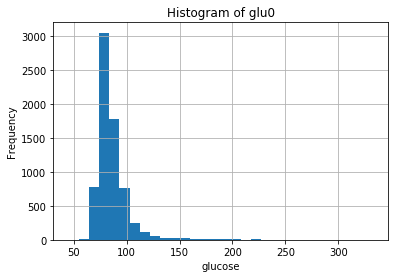

In [56]:
KoGES_Whole['A01_GLU0_TR'].hist(bins=30)
plt.xlabel('glucose')  # x축 라벨을 설정합니다.
plt.ylabel('Frequency')  # y축 라벨을 설정합니다.
plt.title('Histogram of glu0')  # 그래프 제목을 설정합니다.
plt.show()  # 그래프를 출력합니다.

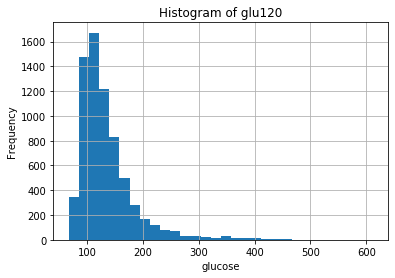

In [57]:
KoGES_Whole['A01_GLU120_TR'].hist(bins=30)
plt.xlabel('glucose')  # x축 라벨을 설정합니다.
plt.ylabel('Frequency')  # y축 라벨을 설정합니다.
plt.title('Histogram of glu120')  # 그래프 제목을 설정합니다.
plt.show()  # 그래프를 출력합니다.

In [36]:
num_specific_rows = KoGES_Glucose[(KoGES_Glucose['A01_HBA1C'] > 5.6) & (KoGES_Glucose['A01_HBA1C'] < 6.5)].shape[0]
print(num_specific_rows)

3245


In [8]:
num_specific_rows = KoGES_Comm_Pheno[(KoGES_Comm_Pheno['A01_GLU0_TR'] == 99999) | (KoGES_Comm_Pheno['A01_GLU0_TR'] == 66666) | (KoGES_Comm_Pheno['A01_GLU0_TR'] == 77777)].shape[0]
print(num_specific_rows)

278


In [7]:
num_specific_rows = KoGES_Comm_Pheno[(KoGES_Comm_Pheno['A01_GLU0_ORI'] == 99999) | (KoGES_Comm_Pheno['A01_GLU0_ORI'] == 66666) | (KoGES_Comm_Pheno['A01_GLU0_ORI'] == 77777)].shape[0]
print(num_specific_rows)

278


In [9]:
num_specific_rows = KoGES_Comm_Pheno[(KoGES_Comm_Pheno['A01_GLU120_TR'] == 99999) | (KoGES_Comm_Pheno['A01_GLU120_TR'] == 66666) | (KoGES_Comm_Pheno['A01_GLU120_TR'] == 77777)].shape[0]
print(num_specific_rows)

477


In [ ]:
num_specific_rows = KoGES_Comm_Pheno[(KoGES_Comm_Pheno['A01_GLU60_ORI'] == 99999) | (KoGES_Comm_Pheno['A01_GLU60_ORI'] == 66666)].shape[0]
print(num_specific_rows)